# Import packages and data 

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import scipy.stats
import anndata
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from scipy import sparse
matplotlib_axes_logger.setLevel('ERROR')
# silence NumbaPerformanceWarning
import warnings
from numba.errors import NumbaPerformanceWarning
warnings.filterwarnings("ignore", category=NumbaPerformanceWarning)

/Users/b8058304/.pyenv/versions/3.6.4/envs/py36/lib/python3.6/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


In [2]:
sc.settings.verbosity = 1  # verbosity: errors (0), warnings (1), info (2), hints (3)
# Set up the plot config for viewing the annotation clearly.
sc.settings.set_figure_params(dpi=120, dpi_save=1000)
sc.logging.print_versions()

scanpy==1.4.4 anndata==0.7.1 umap==0.3.10 numpy==1.17.1 scipy==1.4.1 pandas==1.0.5 scikit-learn==0.22.2.post1 statsmodels==0.11.1 python-igraph==0.8.0 louvain==0.6.1


In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Load FBM progen lineage

In [4]:
adata = sc.read('/Users/b8058304/Documents/PhD_work/Coding/bm_plus_19pcw/data/bm_plus_19pcw_raw_dr_20200713.h5ad')

In [5]:
adata.raw = adata

In [6]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
CD4 T cell                   327
CD8 T cell                   171
CD14 monocyte               8787
CD56 bright NK               540
CMP                          425
DC1                           50
DC2                          598
DC3                          705
DC precursor                 201
ELP                         1358
GMP                         1285
HSC                           92
ILC precursor                 67
LMPP                          34
MEMP                          16
MEP                          269
MK                          1036
MOP                         3990
MPP myeloid                   92
NK T cell                    111
NK progenitor                 26
Treg                          62
adipo-CAR                    359
arteriolar fibroblast         84
basophil                     139
chondrocyte                   81
early MK                    1665
early erythroid             7534
early osteoblast             291
endosteal fibroblast          5

In [7]:
progen_celltypes = ['HSC', 'MEMP', 
                    'MPP myeloid',
                   'LMPP', 'early erythroid', 'MEP', 'early MK', 'eo/baso/mast precursor',
                    'MOP', 'CMP', 'GMP', 'promyelocyte',
                   'ELP', 'pre pro B progenitor']

In [8]:
adata = adata[adata.obs["cell.labels"].isin(progen_celltypes)].copy()

In [9]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
CMP                        425
ELP                       1358
GMP                       1285
HSC                         92
LMPP                        34
MEMP                        16
MEP                        269
MOP                       3990
MPP myeloid                 92
early MK                  1665
early erythroid           7534
eo/baso/mast precursor     175
pre pro B progenitor      5428
promyelocyte              2386
dtype: int64

In [10]:
adata.shape

(24749, 33712)

# Pre-process the dataset

In [11]:
# normalise count data 
sc.pp.normalize_total(adata)

In [12]:
# log the count data 
sc.pp.log1p(adata)

In [13]:
# find variable genes
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5) 

In [14]:
# scale the data 
sc.pp.scale(adata, max_value=10)

In [15]:
# scale the negative values in adata.X (which have been normalised, logged and scaled) to zero 
adata.X = np.where(adata.X < 0, 0, adata.X)

# Run some violin plots

In [16]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
CMP                        425
ELP                       1358
GMP                       1285
HSC                         92
LMPP                        34
MEMP                        16
MEP                        269
MOP                       3990
MPP myeloid                 92
early MK                  1665
early erythroid           7534
eo/baso/mast precursor     175
pre pro B progenitor      5428
promyelocyte              2386
dtype: int64

In [17]:
overall_genes = ['CLEC9A', 'CD34', 'SPINK2', 'KLF1', 'ITGA2B', 'GATA2', 'MPO', 'CSF1R', 'CEBPA',
                'BCL11A', 'IL7R', 'IL2RG']

overall_celltypes = ['HSC', 'MPP myeloid', 'LMPP', 'MEMP', 'MEP', 'early MK', 'eo/baso/mast precursor', 
                     'early erythroid', 'CMP', 'GMP', 'MOP', 'promyelocyte',  'ELP', 'pre pro B progenitor']

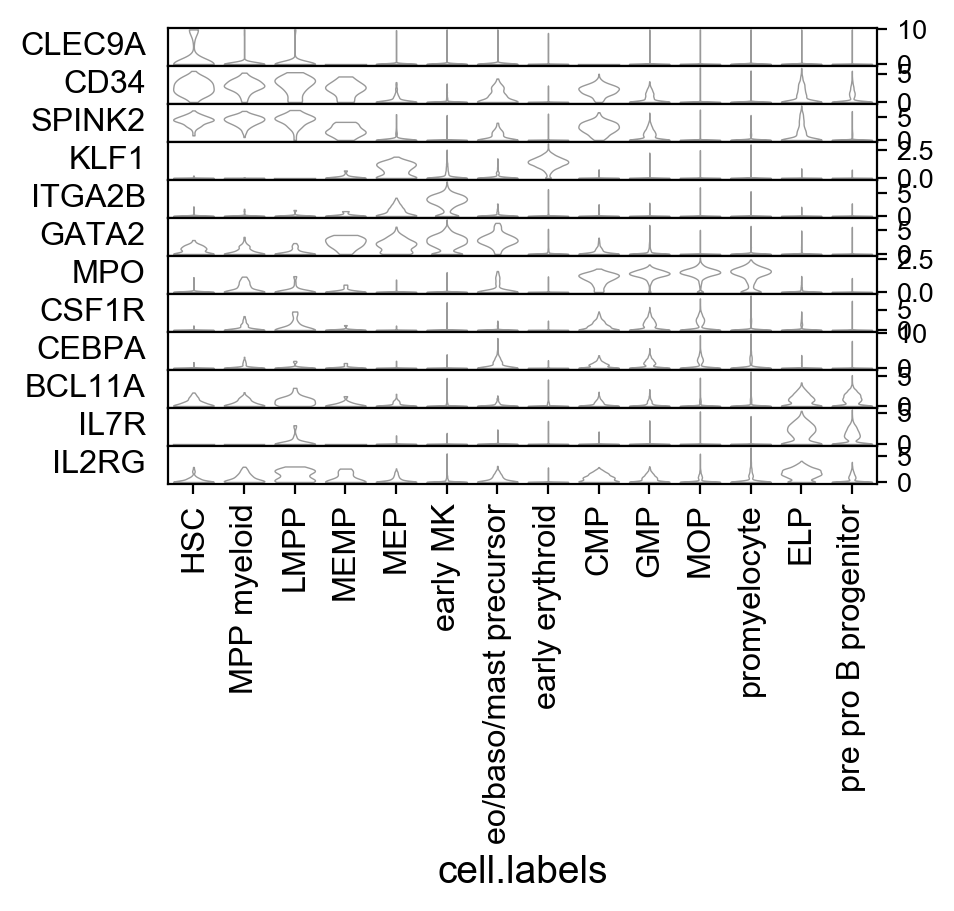

In [18]:
sc.settings.set_figure_params(dpi=100, dpi_save=1000)

subset = adata
subset.obs["cell.labels"] = subset.obs["cell.labels"].astype('category')
subset.obs["cell.labels"] = subset.obs["cell.labels"].cat.reorder_categories(overall_celltypes)

sc.pl.stacked_violin(subset, var_names=overall_genes, save="progen_overall_genes_violin_20200714.pdf", 
                     swap_axes=True,
                     groupby='cell.labels', use_raw=False, figsize=(5,3), 
                     row_palette=['#ffffff'])